# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [33]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
Countries=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countries=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        Countries.append(countries)

# Print the city count to confirm sufficient count
len(cities)


645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Creating Dataframe
Weather_data=pd.DataFrame({'City':cities})

Weather_data['Cloudiness']=''
Weather_data['Country']=Countries
Weather_data['Date']=''
Weather_data['Humidity']=''
Weather_data['Lat']=''
Weather_data['Lng']=''
Weather_data['Max Temp']=''
Weather_data['Wind Speed']=''
#Dropping Duplicate Cities
Weather_data=Weather_data.drop_duplicates('City')
#converting in upper case
Weather_data.Country=Weather_data.Country.str.upper()
Weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambanglipuro,,ID,,,,,,
1,rikitea,,PF,,,,,,
2,punta arenas,,CL,,,,,,
3,taolanaro,,MG,,,,,,
4,airai,,PW,,,,,,


In [42]:
import openweathermapy.core as owm
url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
#counters for priting format
timer=0
counter=1
print("Beginning Data Retrival")
print("-------------------------------")
for index,row in Weather_data.iterrows():
    
    query_url= f"{url}appid={api_key}&units={units}&q={row['City']}"
    response = requests.get(query_url).json()
    
    
    timer=timer+1
    print(f"Processing Record {timer} of Set {counter} | {row['City']}")
    try:     
        Weather_data.set_value(index, "Lat", response["coord"]["lat"])
        Weather_data.set_value(index, "Lng", response["coord"]["lon"])
        Weather_data.set_value(index, "Date", response["dt"])
        Weather_data.set_value(index, "Humidity", response["main"]["humidity"])
        Weather_data.set_value(index, "Max Temp", response["main"]["temp_max"])
        Weather_data.set_value(index, "Wind Speed", response["wind"]["speed"])
        Weather_data.set_value(index, "Cloudiness", response["clouds"]["all"])
    except:
        print("City not found. Skipping...")
        Weather_data.set_value(index, "Lat",'NaN')
        Weather_data.set_value(index, "Lng", 'NaN')
        Weather_data.set_value(index, "Date", 'NaN')
        Weather_data.set_value(index, "Humidity", 'NaN')
        Weather_data.set_value(index, "Max Temp", 'NaN')
        Weather_data.set_value(index, "Wind Speed", 'NaN')
        Weather_data.set_value(index, "Cloudiness", 'NaN')
    if (timer % 50) == 0:
        counter=counter+1
print("---------------------------------------------")

Beginning Data Retrival
-------------------------------
Processing Record 1 of Set 1 | bambanglipuro
Processing Record 2 of Set 1 | rikitea


C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is de

Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...


C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is de

Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | haines junction
Processing Record 10 of Set 1 | korla
City not found. Skipping...
Processing Record 11 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 12 of Set 1 | haimen
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | may pen
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | jodhpur
Processing Record 19 of Set 1 | aksu
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | budureasa
Processing Record 24 of Set 1 | camaqua
Processing Record 25 of Set 1 | ghansor
Processing Record 26 of Set 1 | axim
Processing Record 27 of Set 1 | lamu
Processing Record 28 of S

Processing Record 190 of Set 4 | seymchan
Processing Record 191 of Set 4 | hasaki
Processing Record 192 of Set 4 | asau
City not found. Skipping...
Processing Record 193 of Set 4 | lufilufi
Processing Record 194 of Set 4 | esperance
Processing Record 195 of Set 4 | panjakent
Processing Record 196 of Set 4 | sahuaripa
Processing Record 197 of Set 4 | faanui
Processing Record 198 of Set 4 | coquimbo
Processing Record 199 of Set 4 | pulau sebang
Processing Record 200 of Set 4 | dikson
Processing Record 201 of Set 5 | jamestown
Processing Record 202 of Set 5 | provideniya
Processing Record 203 of Set 5 | hermanus
Processing Record 204 of Set 5 | upernavik
Processing Record 205 of Set 5 | sao filipe
Processing Record 206 of Set 5 | shebalino
Processing Record 207 of Set 5 | pizarro
Processing Record 208 of Set 5 | taburi
City not found. Skipping...
Processing Record 209 of Set 5 | brokopondo
Processing Record 210 of Set 5 | krasnoselkup
City not found. Skipping...
Processing Record 211 of S

Processing Record 368 of Set 8 | rundu
Processing Record 369 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 370 of Set 8 | arcata
Processing Record 371 of Set 8 | tabuk
Processing Record 372 of Set 8 | kerema
Processing Record 373 of Set 8 | vieux-habitants
Processing Record 374 of Set 8 | fallon
Processing Record 375 of Set 8 | asifabad
Processing Record 376 of Set 8 | harlingen
Processing Record 377 of Set 8 | weesp
Processing Record 378 of Set 8 | emerald
Processing Record 379 of Set 8 | rawson
Processing Record 380 of Set 8 | pueblo nuevo
Processing Record 381 of Set 8 | carutapera
Processing Record 382 of Set 8 | buala
Processing Record 383 of Set 8 | lata
Processing Record 384 of Set 8 | ingham
Processing Record 385 of Set 8 | montepuez
Processing Record 386 of Set 8 | moskovskiy
Processing Record 387 of Set 8 | penzance
Processing Record 388 of Set 8 | tadine
Processing Record 389 of Set 8 | hofn
Processing Record 390 of Set 8 | abaza
Processing Record 39

Processing Record 547 of Set 11 | bayji
Processing Record 548 of Set 11 | braslav
City not found. Skipping...
Processing Record 549 of Set 11 | tateyama
Processing Record 550 of Set 11 | mount isa
Processing Record 551 of Set 12 | pombas
Processing Record 552 of Set 12 | tokur
Processing Record 553 of Set 12 | villarrica
Processing Record 554 of Set 12 | yeniseysk
Processing Record 555 of Set 12 | taoudenni
Processing Record 556 of Set 12 | pokhara
Processing Record 557 of Set 12 | tabat
Processing Record 558 of Set 12 | byron bay
Processing Record 559 of Set 12 | gidole
Processing Record 560 of Set 12 | kerouane
Processing Record 561 of Set 12 | itarema
Processing Record 562 of Set 12 | te anau
Processing Record 563 of Set 12 | martinsicuro
Processing Record 564 of Set 12 | sao mateus
Processing Record 565 of Set 12 | tralee
Processing Record 566 of Set 12 | zabaykalsk
Processing Record 567 of Set 12 | binga
Processing Record 568 of Set 12 | faya
Processing Record 569 of Set 12 | sicu

In [64]:
#filling the empty columns with NaN and Dropping them
Weather_data.replace(["NaN"], np.nan, inplace = True)
Weather_data= Weather_data.dropna()


C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
Weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

In [47]:
Weather_data.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

In [49]:
Weather_data.astype(str).head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bambanglipuro,68.0,ID,1536625043.0,93.0,-7.95,110.28,71.58,3.71
1,rikitea,20.0,PF,1536625043.0,100.0,-23.12,-134.97,73.2,8.75
2,punta arenas,75.0,CL,1536620400.0,86.0,-53.16,-70.91,42.8,1.12
4,airai,0.0,PW,1536625044.0,70.0,-8.93,125.41,73.65,2.48
5,port lincoln,76.0,AU,1536625044.0,81.0,-34.72,135.86,61.77,12.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

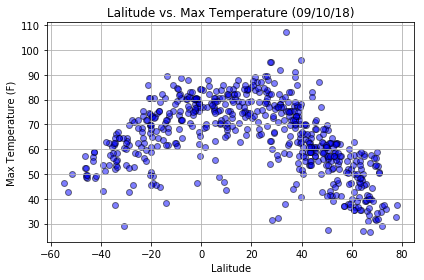

In [59]:
#Latitude Vs Temperature Plot
Lat_Temp=plt.scatter(Weather_data['Lat'],Weather_data['Max Temp'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Max Temperature (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Max Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

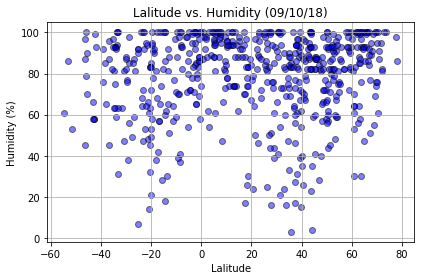

In [61]:
#Latitude Vs Humidity Plot
Lat_hum=plt.scatter(Weather_data['Lat'],Weather_data['Humidity'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Humidity (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

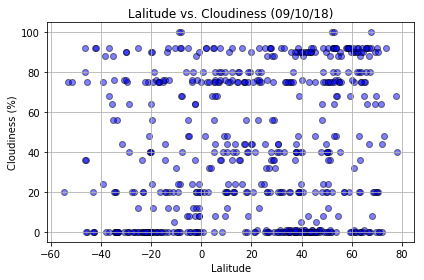

In [62]:
#Latitude Vs Cloudiness Plot
Lat_cloud=plt.scatter(Weather_data['Lat'],Weather_data['Cloudiness'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Cloudiness (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

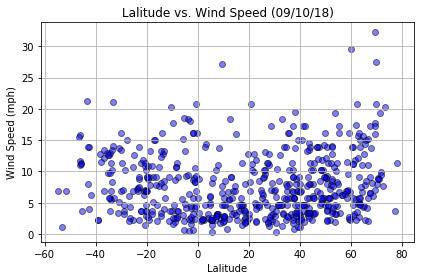

In [63]:
#Latitude Vs wind speed Plot
Lat_WSP=plt.scatter(Weather_data['Lat'],Weather_data['Wind Speed'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Wind Speed (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Wind Speed.png")
plt.show()